## 3D Layer Surface Segmentation 

**Add Proper references here**

**NOTICE:** This notebook is a continuation of layered surface detection introduced in the ```LayerSegmentation2D.ipynb``` notebook.

Previously we segmented 2D images, but the ```MaxflowBuilder``` module actually supports N-D data. If ```data``` is a 3D ```ndarray``` the code still works 'as is'. The surfaces are always found on the first axis of the input data.

In [1]:
# Load modules
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from qimtools import visualization, inspection, io
from slgbuilder import GraphObject,MaxflowBuilder

In [2]:
in_dir = 'data/'
Vol_path = os.path.join(in_dir, 'layer3D.tiff')

# Load the data
vol = io.Volume( Vol_path )

(164, 200, 8)


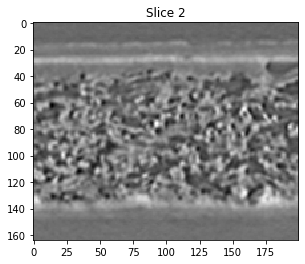

In [3]:
# Convert the stack of 2D slices to a 3D volume
vol = vol.concatenate().astype(np.int32)
vol = np.transpose(vol,(1,2,0)) # Re-order volume
print(vol.shape)

f,ax = plt.subplots()
ax.imshow(vol[..., 2], cmap='gray')
ax.set_title('Slice 2')
plt.show()

Like previously we want two segmentations in each slice of the volume.

In [4]:
layers = []
for i in range(2):
    layers.append(GraphObject(255-vol))

In [5]:
helper = MaxflowBuilder()
helper.add_objects(layers)
helper.add_layered_boundary_cost()
helper.add_layered_smoothness()  

for i in range(len(layers)-1):
    helper.add_layered_containment(layers[i], layers[i+1], min_margin=10)

In [6]:
flow = helper.solve()
print('Maximum flow/minimum energy:', flow)

Maximum flow/minimum energy: 1386559


In [7]:
segmentations = [helper.what_segments(l).astype(np.int32) for l in layers]
segmentation_lines = [np.argmin(s[..., 2], axis=0) for s in segmentations]

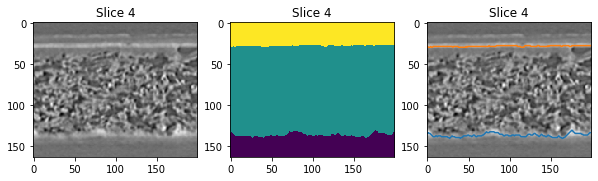

In [8]:
sliceNo = 4

f,ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(vol[..., 2], cmap='gray')
ax[0].set_title(f'Slice {sliceNo}')
ax[1].imshow(np.sum(segmentations, axis=0)[..., 2])
ax[1].set_title(f'Slice {sliceNo}')
ax[2].imshow(vol[..., 2], cmap='gray')
for line in segmentation_lines:
    ax[2].plot(line)
ax[2].set_title(f'Slice {sliceNo}')
plt.show()